# Regularization Techniques

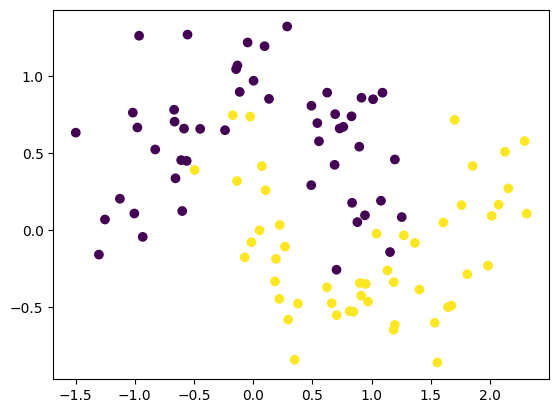

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 

x,y = make_moons(n_samples = 100, noise = 0.25, random_state = 2)

import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               384       
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9600/9600 [==============================] - 13s 1ms/step


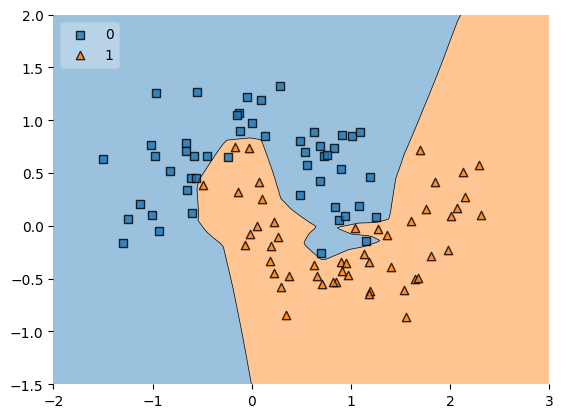

In [14]:
# Generate simple ANN network
model_1 = Sequential()
model_1.add(Dense(128, input_dim = 2, activation = 'relu'))
model_1.add(Dense(128, activation = 'relu'))
model_1.add(Dense(1, activation = 'sigmoid'))
model_1.summary()

adam = Adam(lr = 0.01)
model_1.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
metrics = model_1.fit(x, y, epochs = 100, verbose = 0)

history_1 = model_1.fit(x, y, epochs=2000, validation_split = 0.2,verbose = 0)

plot_decision_regions(x, y.astype('int'), clf = model_1, legend = 2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

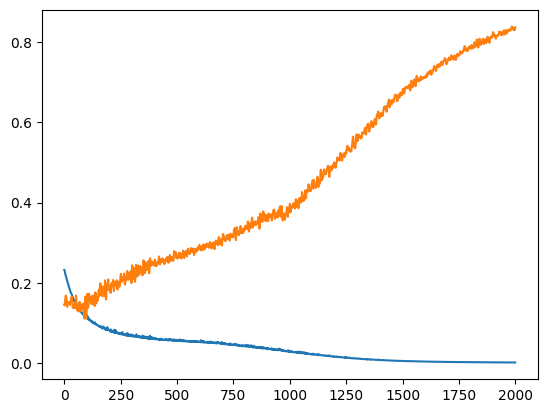

In [15]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               384       
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9600/9600 [==============================] - 16s 2ms/step


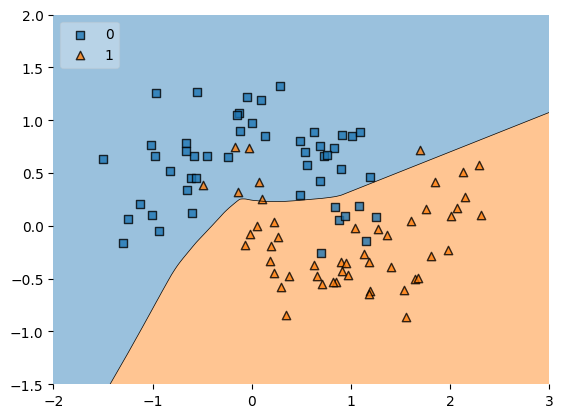

In [16]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim = 2, activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(0.01)))
model_2.add(Dense(128, activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(0.01)))
model_2.add(Dense(1, activation = 'sigmoid'))
model_2.summary()

adam = Adam(lr = 0.01)
model_2.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

history_2 = model_2.fit(x, y.astype('int'), validation_split = 0.2, epochs = 100, verbose = 0)

plot_decision_regions(x, y.astype('int'), clf = model_2, legend = 2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()


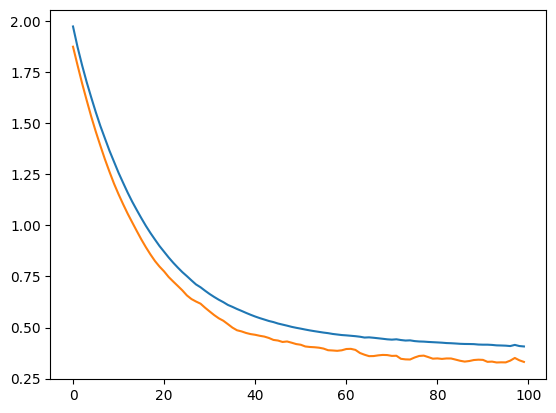

In [17]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

In [18]:
# Calculate the accuracy of the model 1
acc_model_1 = history_1.history['accuracy'][-1] * 100

# Calculate the accuracy of the model 2
acc_model_2 = history_2.history['accuracy'][-1] * 100

print(f"The accuracy of the model 1 is: {acc_model_1:0.2f}%")
print(f"The accuracy of the model 2 is: {acc_model_2:0.2f}%")

The accuracy of the model 1 is: 100.00%
The accuracy of the model 2 is: 85.00%
